In [56]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt

In [57]:
InputPath = ""
X = pickle.load(open(InputPath+"X.pickle","rb"))
y = pickle.load(open(InputPath+"y.pickle","rb"))

In [58]:
X = X/255.0
y = tf.keras.utils.to_categorical(y).astype(int)
print(X.shape)
print(y.shape)

(875, 50, 50, 3)
(875, 5)


In [59]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

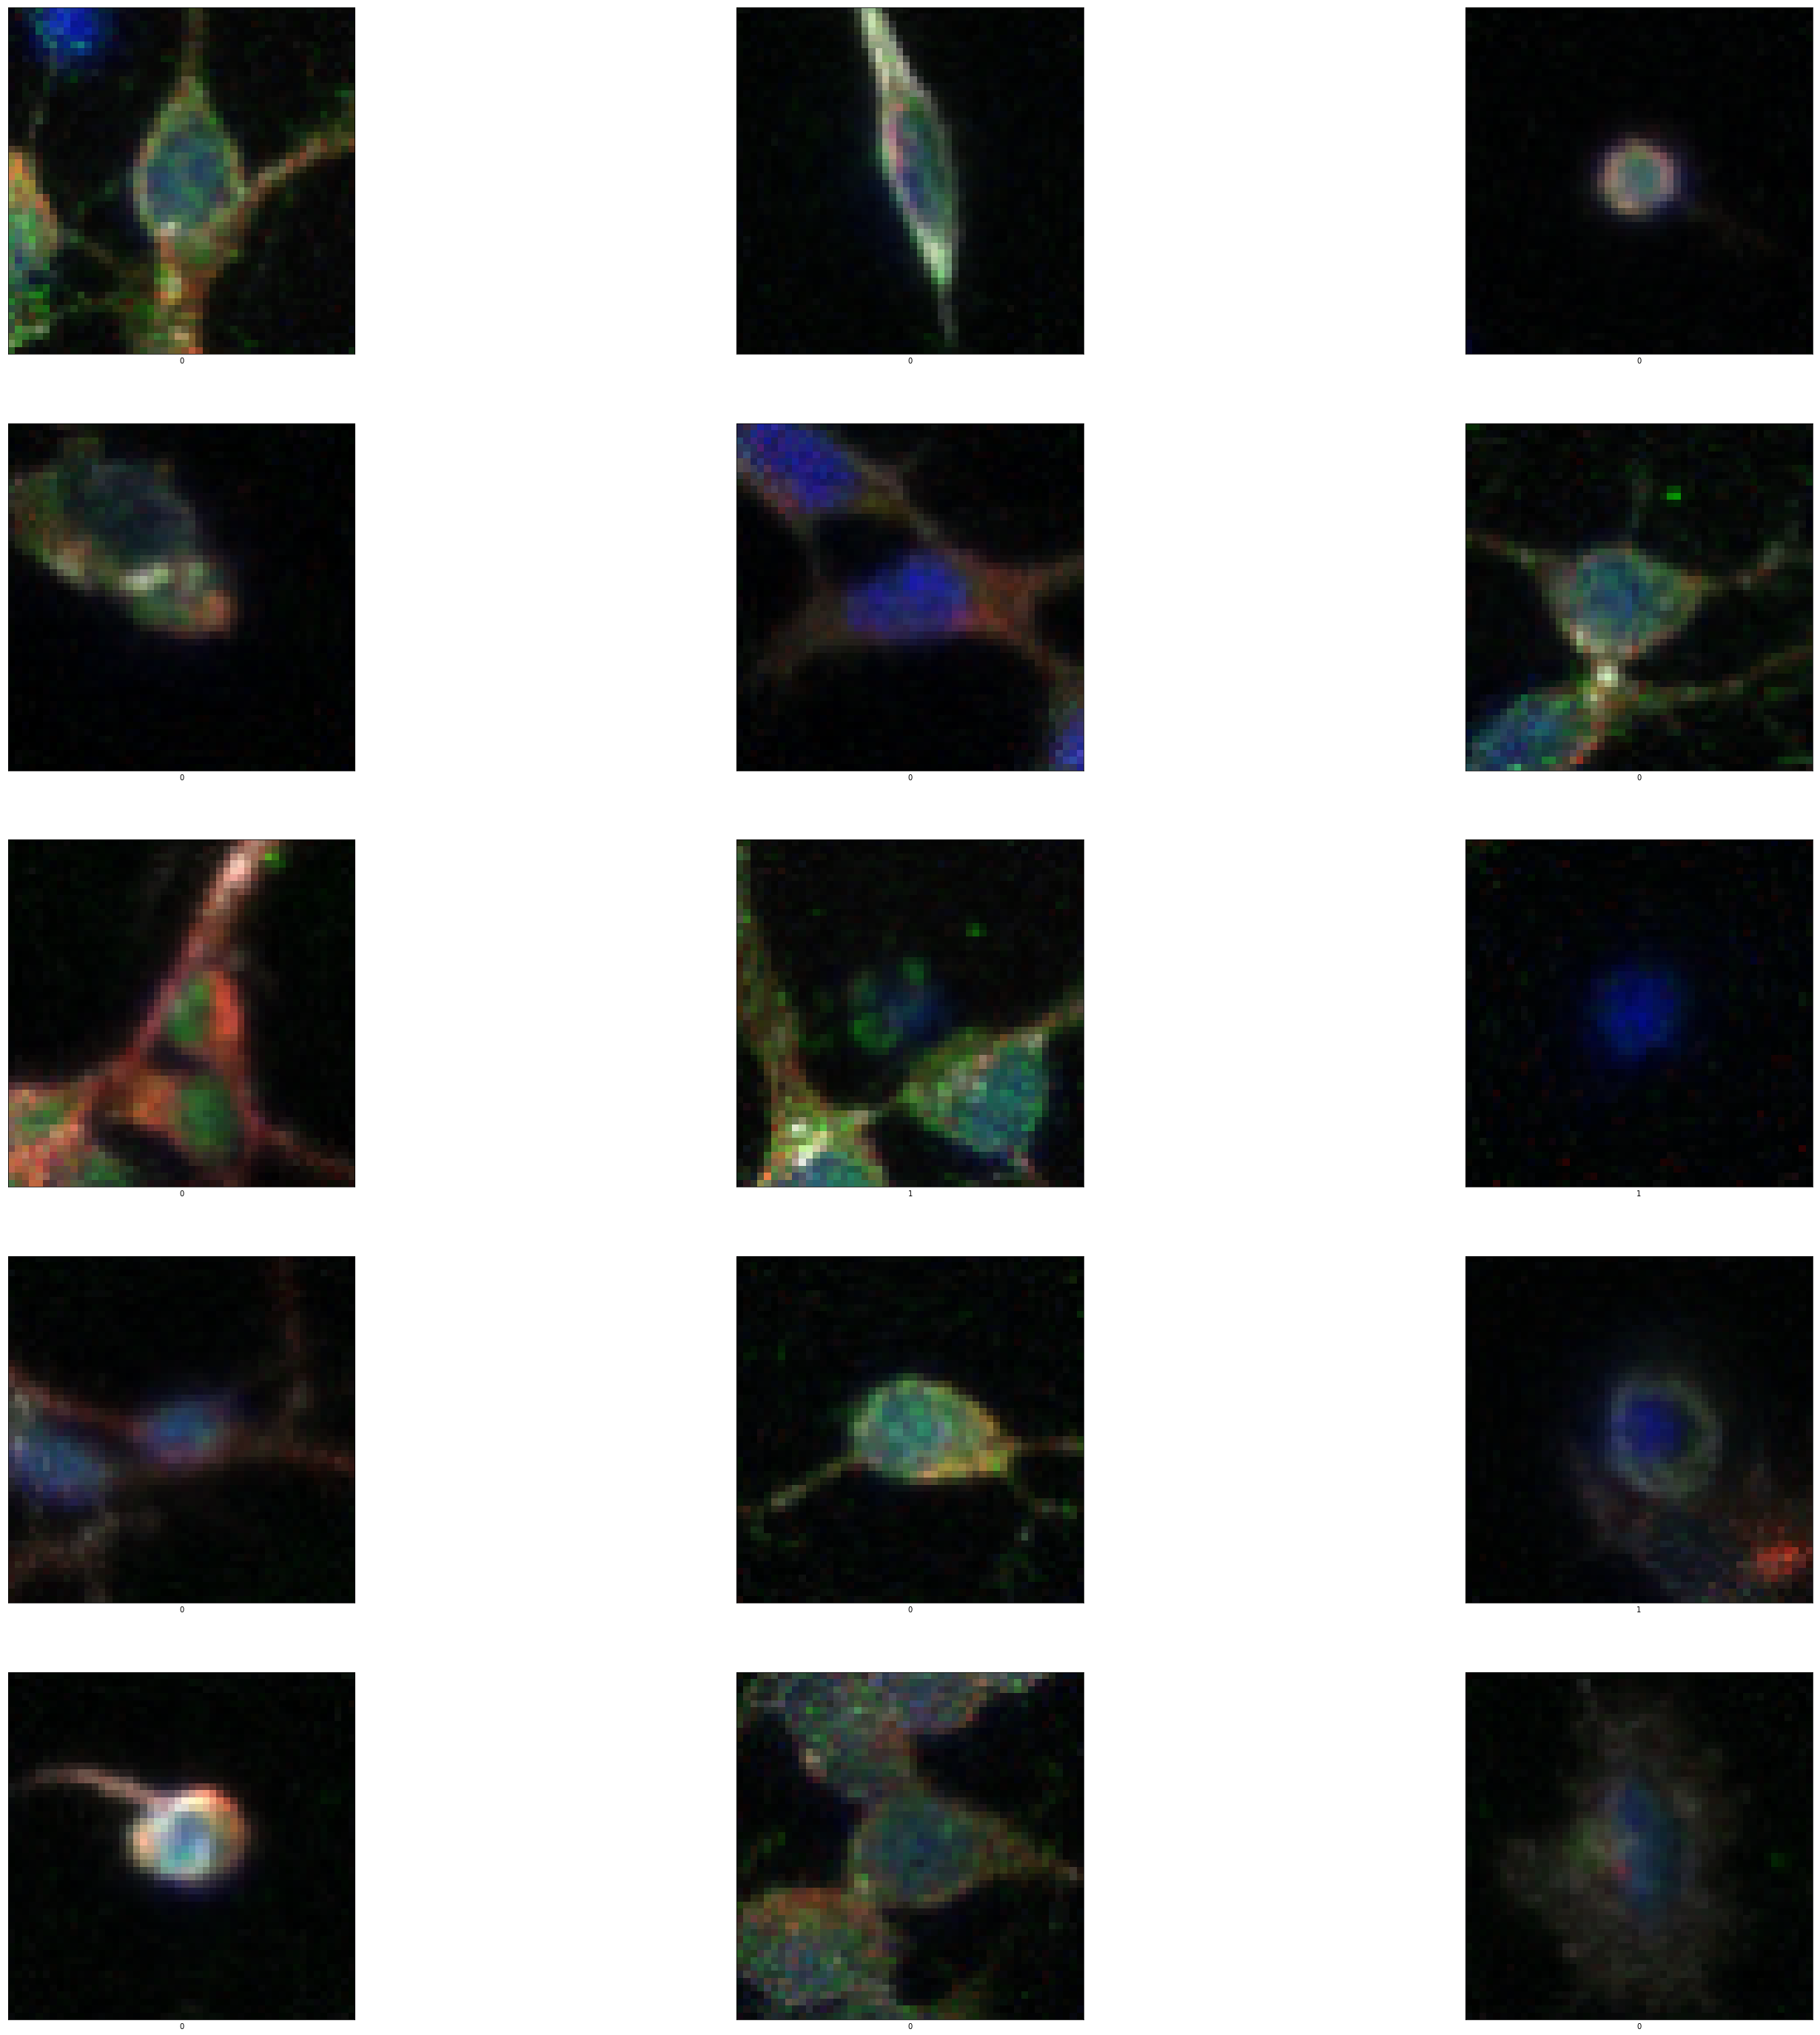

In [60]:
plt.figure(figsize=(50,50))
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    plt.xlabel(str(train_y[i][0]))
plt.show()

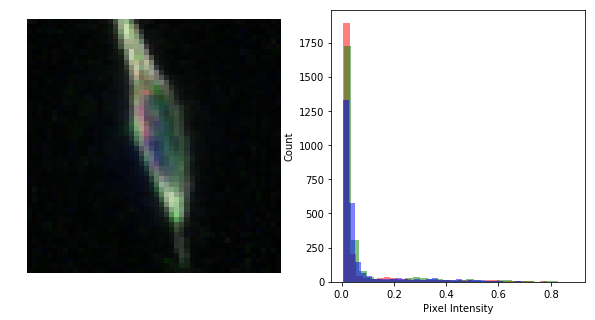

In [61]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(train_X[1])

In [62]:
import time
NAME = "Cnn64x2-{}-fix_X_withActivation".format(int(time.time()))

In [63]:
# gpu_option = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [64]:
# weights = [175, 290, 326, 220, 576]
# total = sum(weights)
# weights[:] = [x / total for x in weights]
# print(weights)
# classWeights = { i : weights[i] for i in range(0, len(weights) ) }
# classWeights

In [65]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME))

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import cv2, numpy as np

def model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(50,50,3),strides=1))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model

model = model()

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               4333696   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [54]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) 

In [55]:
history = model.fit(datagen.flow(train_X, train_y, batch_size=32), epochs=10000, 
                    validation_data=(test_X, test_y))

Epoch 1/1000
22/22 [==============================] - 1s 45ms/step - loss: 1.6096 - acc: 0.1971 - val_loss: 1.6113 - val_acc: 0.1543
Epoch 2/1000
22/22 [==============================] - 1s 24ms/step - loss: 1.6087 - acc: 0.2014 - val_loss: 1.6101 - val_acc: 0.1314
Epoch 3/1000
22/22 [==============================] - 1s 27ms/step - loss: 1.6083 - acc: 0.1829 - val_loss: 1.6087 - val_acc: 0.1314
Epoch 4/1000
22/22 [==============================] - 1s 29ms/step - loss: 1.6047 - acc: 0.2157 - val_loss: 1.6075 - val_acc: 0.1371
Epoch 5/1000
22/22 [==============================] - 1s 27ms/step - loss: 1.6080 - acc: 0.1986 - val_loss: 1.6063 - val_acc: 0.1143
Epoch 6/1000
22/22 [==============================] - 1s 29ms/step - loss: 1.6025 - acc: 0.2000 - val_loss: 1.6050 - val_acc: 0.1143
Epoch 7/1000
22/22 [==============================] - 1s 30ms/step - loss: 1.6005 - acc: 0.2071 - val_loss: 1.6038 - val_acc: 0.1029
Epoch 8/1000
22/22 [==============================] - 1s 27ms/step - 

KeyboardInterrupt: 

175/175 - 0s - loss: 1.0694 - acc: 0.6057

Keras CNN #1C - accuracy: 0.60571426 


              precision    recall  f1-score   support

        Dead       0.76      1.00      0.87        29
           1       0.57      0.47      0.52        34
           2       0.67      0.44      0.53        36
           3       0.43      0.51      0.47        39
     Complex       0.64      0.68      0.66        37

    accuracy                           0.61       175
   macro avg       0.62      0.62      0.61       175
weighted avg       0.61      0.61      0.60       175



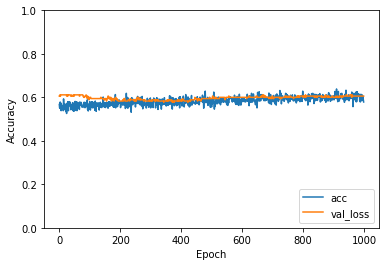

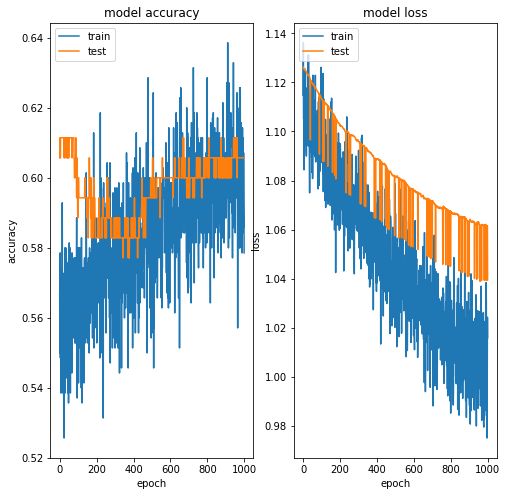

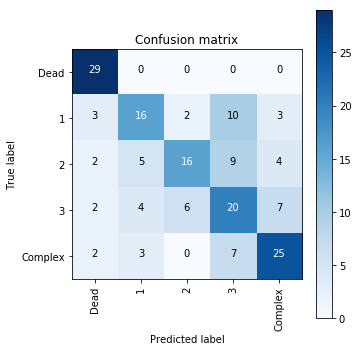

In [41]:
import sklearn
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def plot_learning_curve(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    #plt.clf()
    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')

def plot_accuracy_curve(history):    
    plt.plot(history.history['acc'], label='acc')
    plt.plot(history.history['val_acc'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.0, 1])
    plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=2)

plot_accuracy_curve(history)
y_pred = model.predict(test_X)
map_characters = {0:'Dead',1:'1',2:'2',3:'3',4:'Complex'}
print('\n', sklearn.metrics.classification_report(np.where(test_y > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')    
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(test_y,axis=1)
# plotKerasLearningCurve()
# plt.show()  
plot_learning_curve(history)
plt.show()
confusion_mtx = sklearn.metrics.confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(map_characters.values())) 
plt.show()
